## Generate predictions from models

### Import packages 

In [8]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
tfkl = tf.keras.layers

### Import functions

In [9]:
import evaluation_functions
import importlib
importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

#### State data

In [10]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')
state_final_test = np.loadtxt('../data/state_final_test.txt')

#### Country data

In [11]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')
country_final_test = np.loadtxt('../data/country_final_test.txt')

#### Combined data

In [12]:
combined_training = np.loadtxt('../data/combined_training.txt')
combined_test = np.loadtxt('../data/combined_test.txt')
combined_final_test = np.loadtxt('../data/combined_final_test.txt')

In [13]:
geos_key = np.load('../data/geos_key.npy')
geo_dict = {int(code): geo for geo, code in geos_key}

In [14]:
geo_dict

{0: 'AK',
 1: 'AL',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'FL',
 9: 'GA',
 10: 'HI',
 11: 'ID',
 12: 'IL',
 13: 'IN',
 14: 'IA',
 15: 'KS',
 16: 'KY',
 17: 'LA',
 18: 'ME',
 19: 'MD',
 20: 'MA',
 21: 'MI',
 22: 'MN',
 23: 'MS',
 24: 'MO',
 25: 'MT',
 26: 'NE',
 27: 'NV',
 28: 'NH',
 29: 'NJ',
 30: 'NM',
 31: 'NY',
 32: 'NC',
 33: 'ND',
 34: 'OH',
 35: 'OK',
 36: 'OR',
 37: 'PA',
 38: 'RI',
 39: 'SC',
 40: 'SD',
 41: 'TN',
 42: 'TX',
 43: 'UT',
 44: 'VT',
 45: 'VA',
 46: 'WA',
 47: 'WV',
 48: 'WI',
 49: 'WY',
 50: 'AUS',
 51: 'AUT',
 52: 'BEL',
 53: 'BGR',
 54: 'BLR',
 55: 'CAN',
 56: 'CHE',
 57: 'CZE',
 58: 'DNK',
 59: 'ESP',
 60: 'EST',
 61: 'FIN',
 62: 'FRATNP',
 63: 'GBRTENW',
 64: 'GBR_NIR',
 65: 'GBR_SCO',
 66: 'GRC',
 67: 'HUN',
 68: 'IRL',
 69: 'ISL',
 70: 'ISR',
 71: 'ITA',
 72: 'JPN',
 73: 'LTU',
 74: 'LUX',
 75: 'LVA',
 76: 'NLD',
 77: 'NOR',
 78: 'NZL_NM',
 79: 'POL',
 80: 'PRT',
 81: 'RUS',
 82: 'SVK',
 83: 'SVN',
 84: 'SWE',
 85: 'TWN',
 86: 'UKR'

### Import predictions

Predictions from DL models trained on raw mortality rates 

In [15]:
# DL predictions - trained on all data
dl_train_pred = np.loadtxt("../data/country_training_predictions_log_new.txt")
dl_test_pred = np.loadtxt("../data/country_test_predictions_log_new.txt")

# DL predictions - trained on single country (and both genders)
single_pred = {}
for country in list(geo_dict.values())[50:]:
    file_path = os.path.join("../data/", f"{country}_test_predictions_log.txt")
    single_pred[country] = np.loadtxt(file_path)

# LC predictions
lc_test_pred = np.loadtxt("../data/lc_forecast_all.csv", delimiter=",")
lc_train_pred = np.loadtxt("../data/lc_fitted_all.csv", delimiter=",")
lc_test_pred = lc_test_pred[np.lexsort((lc_test_pred[:, 1], lc_test_pred[:, 3], lc_test_pred[:, 2], lc_test_pred[:, 0]))]
lc_train_pred = lc_train_pred[np.lexsort((lc_train_pred[:, 1], lc_train_pred[:, 3], lc_train_pred[:, 2], lc_train_pred[:, 0]))]

# lee-miller predictions
lm_test_pred = np.loadtxt("../data/lm_forecast_all.csv", delimiter=",")
lm_train_pred = np.loadtxt("../data/lm_fitted_all.csv", delimiter=",")
lm_test_pred = lm_test_pred[np.lexsort((lm_test_pred[:, 1], lm_test_pred[:, 3], lm_test_pred[:, 2], lm_test_pred[:, 0]))]
lm_train_pred = lm_train_pred[np.lexsort((lm_train_pred[:, 1], lm_train_pred[:, 3], lm_train_pred[:, 2], lm_train_pred[:, 0]))]

# coherent predictions
c_test_pred = np.loadtxt("../data/coherent_forecast_all.csv", delimiter=",")
c_test_pred = c_test_pred[np.lexsort((c_test_pred[:, 1], c_test_pred[:, 3], c_test_pred[:, 2], c_test_pred[:, 0]))]

In [16]:
# convert lc, lm, and coherent to log scale 
lc_test_pred[:,4][lc_test_pred[:,4] == 0] = 9e-06
lm_test_pred[:,4][lm_test_pred[:,4] == 0] = 9e-06
c_test_pred[:,4][c_test_pred[:,4] == 0] = 9e-06

lc_test_pred[:,4] = np.log(lc_test_pred[:,4])
lm_test_pred[:,4] = np.log(lm_test_pred[:,4])
c_test_pred[:,4] = np.log(c_test_pred[:,4])


In [17]:
# convert actual data to log scale
country_test[:,4][country_test[:,4] == 0] = 9e-06
country_test[:,4] = np.log(country_test[:,4])

##### Get country-specific performance differentials between LC and DL

In [18]:
actual_data_divided = []
dl_test_divided = []
lc_test_divided = []
lm_test_divided = []
c_test_divided = []
for i in range(50,88):
    actual_data_divided.append(country_test[country_test[:, 0] == i])
    dl_test_divided.append(dl_test_pred[dl_test_pred[:, 0] == i])
    lc_test_divided.append(lc_test_pred[lc_test_pred[:, 0] == i])
    lm_test_divided.append(lm_test_pred[lm_test_pred[:, 0] == i])
    c_test_divided.append(c_test_pred[c_test_pred[:, 0] == i])


In [60]:
country_index = 24
# dl_test_one_country = dl_test_divided[country_index].copy()
# dl_test_one_country[:, 4] = np.exp(dl_test_one_country[:, 4])

In [ ]:
# single_test_pred_exp = single_pred['FIN'].copy()
# single_test_pred_exp[:, 4] = np.exp(single_test_pred_exp[:, 4])

In [61]:
c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[country_index], actual_data_divided[country_index], feature_index=3) # 3 is age 
lm_mse, lm_rmse, lm_rrmse = evaluation_functions.calculate_error_by_category(lm_test_divided[country_index], actual_data_divided[country_index], feature_index=3) 
dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[country_index], actual_data_divided[country_index], feature_index=3) 
#dl_fin_mse, dl_fin_rmse, dl_fin_rrmse = evaluation_functions.calculate_error_by_category(single_test_pred_exp, actual_data_divided[country_index], feature_index=3, lograte=True) 

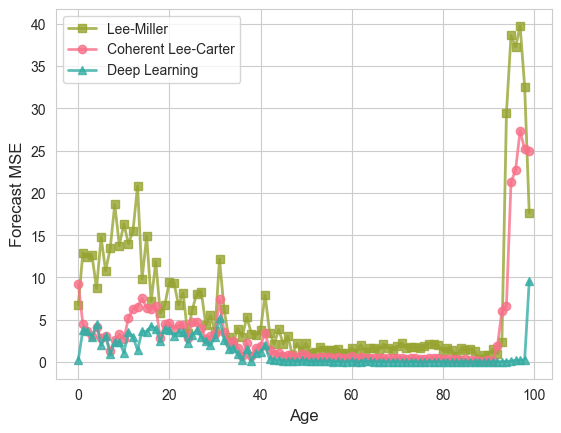

In [62]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(c_mse.items()))
keys2, values2 = zip(*sorted(lm_mse.items()))
keys3, values3 = zip(*sorted(dl_mse.items()))
##keys4, values4 = zip(*sorted(dl_fin_mse.items()))

# Plot the data
plt.plot(keys2, values2, label="Lee-Miller", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys1, values1, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="Deep Learning", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
#plt.plot(keys4, values4, label="DL - Trained on Finland Only", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Age", fontsize=12)
plt.ylabel("Forecast MSE", fontsize=12)
# plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(fontsize=10, loc='best')

plt.savefig("../results/lux_mse_over_age.pdf", format="pdf")

# Show the plot
plt.show()

#### MSE by year

In [23]:
import evaluation_functions

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

In [63]:
c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[country_index], actual_data_divided[country_index], feature_index=2) 
lm_mse, lm_rmse, lm_rrmse = evaluation_functions.calculate_error_by_category(lm_test_divided[country_index], actual_data_divided[country_index], feature_index=2) 
dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[country_index], actual_data_divided[country_index], feature_index=2) 
#dl_fin_mse, dl_fin_rmse, dl_fin_rrmse = evaluation_functions.calculate_error_by_category(fin_test_pred_exp, actual_data_divided[country_index], feature_index=2, lograte=True) 

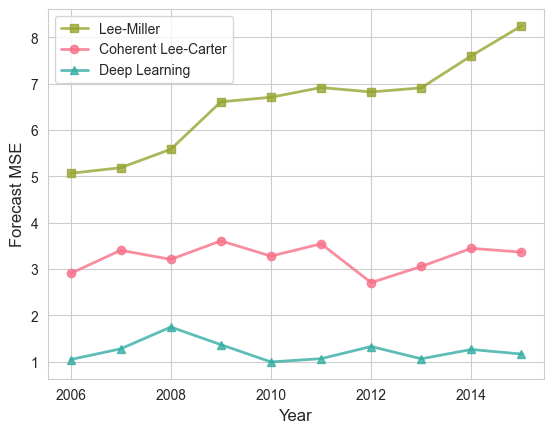

In [65]:
# Set a seaborn style for aesthetics
sns.set_style("whitegrid")

# Use a color palette
palette = sns.color_palette("husl", 4)

# Sort dictionaries by keys (in case keys are not in order)
keys1, values1 = zip(*sorted(c_mse.items()))
keys2, values2 = zip(*sorted(lm_mse.items()))
keys3, values3 = zip(*sorted(dl_mse.items()))
#keys4, values4 = zip(*sorted(dl_mse.items()))

# Plot the data
plt.plot(keys2, values2, label="Lee-Miller", color=palette[1], linestyle='-', marker='s', linewidth=2, alpha=0.8)
plt.plot(keys1, values1, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
plt.plot(keys3, values3, label="Deep Learning", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
#plt.plot(keys4, values4, label="DL - Trained on All Countries", color=palette[3], linestyle='-', marker='d', linewidth=2, alpha=0.8)

# Add labels, legend, and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Forecast MSE", fontsize=12)
#plt.title("Relative RMSEs for Lee-Carter and Deep Learning Models by Age: Georgia")
plt.legend(
    fontsize=10,
    loc='upper left',
    #bbox_to_anchor=(1, 0.9)  # shift up a bit
)


plt.savefig("../results/lux_mse_over_time.pdf", format="pdf")

# Show the plot
plt.show()

### Figures with actual mortality rates plotted against predictions

Plot of actual and fitted/forecasted mortality rates (in training and test sets) for selected ages (0, 20, 80) for US females 

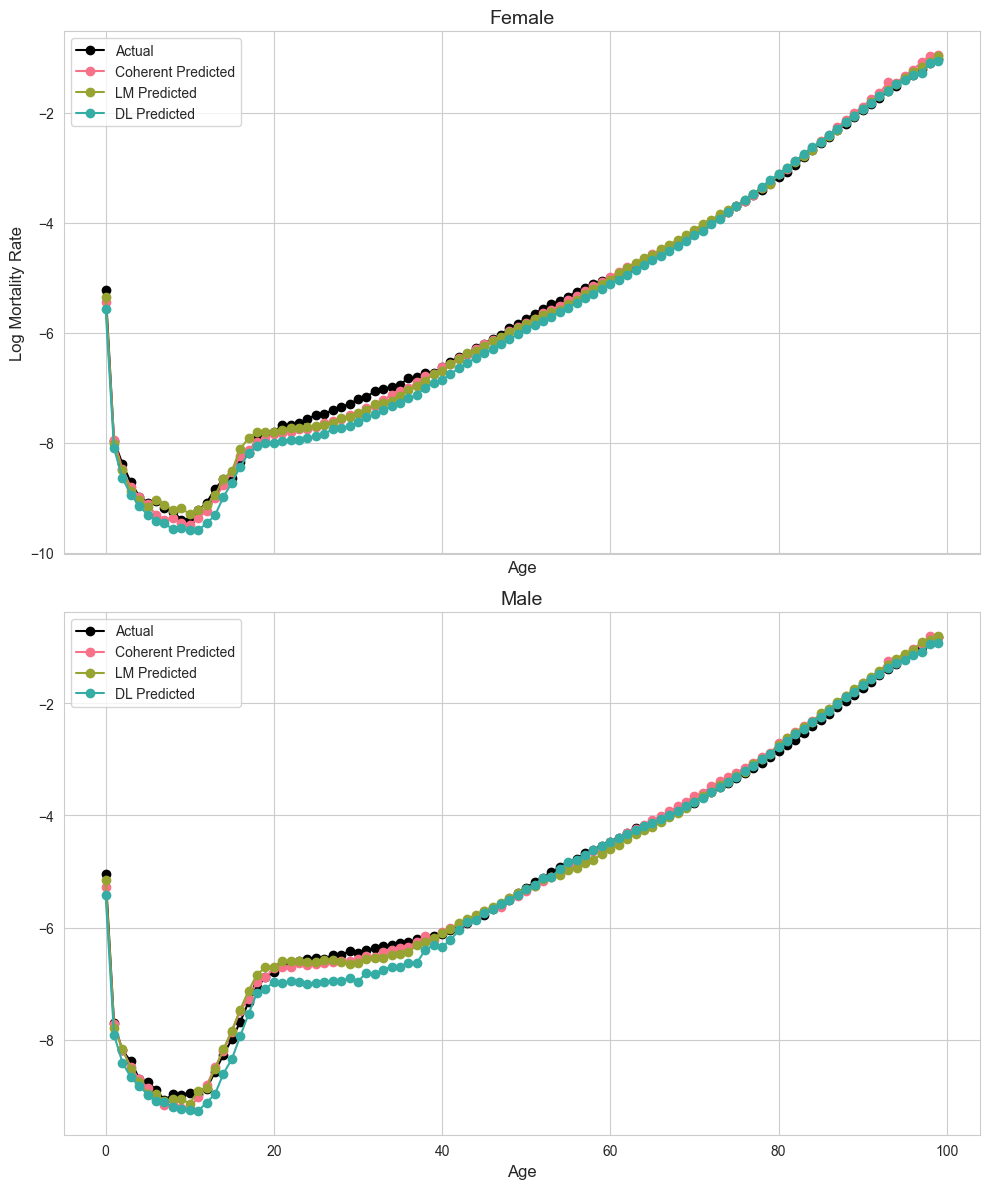

In [26]:
single_actual = actual_data_divided[country_index].copy()
single_c = c_test_divided[country_index].copy()
single_lm = lm_test_divided[country_index].copy()
single_dl = dl_test_divided[country_index].copy()

selected_year = 2015
time_col = 2
mort_col = 4
gender_col = 1
age_col = 3

# Extract unique genders
genders = np.unique(single_actual[:, gender_col])
gender_titles = {0: 'Female', 1: 'Male'}

# aesthetics
sns.set_style("whitegrid")
colors = sns.color_palette("husl", 4)

fig, axes = plt.subplots(len(genders), 1, figsize=(10, 12), sharex=True)

for idx, gender in enumerate(genders):
    ax = axes[idx]

    actual_subset = single_actual[(single_actual[:, time_col] == selected_year) & (single_actual[:, gender_col] == gender)]
    predicted_subset_c = single_c[(single_c[:, time_col] == selected_year) & (single_c[:, gender_col] == gender)]
    predicted_subset_lm = single_lm[(single_lm[:, time_col] == selected_year) & (single_lm[:, gender_col] == gender)]
    predicted_subset_dl = single_dl[(single_dl[:, time_col] == selected_year) & (single_dl[:, gender_col] == gender)]

    actual_subset = actual_subset[np.argsort(actual_subset[:, age_col])]
    predicted_subset_c = predicted_subset_c[np.argsort(predicted_subset_c[:, age_col])]
    predicted_subset_lm = predicted_subset_lm[np.argsort(predicted_subset_lm[:, age_col])]
    predicted_subset_dl = predicted_subset_dl[np.argsort(predicted_subset_dl[:, age_col])]

    ages = actual_subset[:, age_col]
    actual_rates = actual_subset[:, mort_col]
    predicted_rates_lc = predicted_subset_c[:, mort_col]
    predicted_rates_lm = predicted_subset_lm[:, mort_col]
    predicted_rates_dl = predicted_subset_dl[:, mort_col]

    ax.plot(ages, actual_rates, label='Actual', marker='o', color='black')
    ax.plot(ages, predicted_rates_lc, label='Coherent Predicted', marker='o', color=colors[0])
    ax.plot(ages, predicted_rates_lm, label='LM Predicted', marker='o', color=colors[1])
    ax.plot(ages, predicted_rates_dl, label='DL Predicted', marker='o', color=colors[2])

    ax.set_title(f'{gender_titles[gender]}', fontsize=14)
    ax.set_xlabel('Age', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Log Mortality Rate', fontsize=12)

    ax.grid(True)
    ax.legend(fontsize=10)
axes[-1].set_xlabel('Age', fontsize=12)
plt.tight_layout()
plt.savefig("../results/actual_v_fitted_2015_log_side_by_side_us.pdf", format="pdf")
plt.show()

In [ ]:
# selected_ages = [0, 25, 85]
# time_col = 2
# mort_col = 4
# gender_col = 1
# years = np.unique(actual_us_test[:, time_col])

# # aesthetics
# sns.set_style("whitegrid")
# colors = sns.color_palette("husl", len(selected_ages))

# plt.figure(figsize=(12, 6))

# for idx, age in enumerate(selected_ages):
#     # Filter data for the given age
#     actual_subset = actual_us_test[(actual_us_test[:, 3] == age) & (actual_us_test[:, gender_col] == 1)]
#     predicted_subset = lc_test_pred[(lc_test_pred[:, 3] == age) & (lc_test_pred[:, gender_col] == 1)]
#     predicted_subset_dl = country_test_pred_us_only[(country_test_pred_us_only[:, 3] == age) & (country_test_pred_us_only[:, gender_col] == 1)]

#     # Sort by time to ensure proper plotting
#     actual_subset = actual_subset[np.argsort(actual_subset[:, time_col])]
#     predicted_subset = predicted_subset[np.argsort(predicted_subset[:, time_col])]
#     predicted_subset_dl = predicted_subset_dl[np.argsort(predicted_subset_dl[:, time_col])]

#     # Extract values for plotting
#     time_series = actual_subset[:, time_col]
#     actual_rates = actual_subset[:, mort_col]
#     predicted_rates = predicted_subset[:, mort_col]
#     predicted_rates_dl = predicted_subset_dl[:, mort_col]

#     # Plot actual and predicted lines
#     plt.plot(time_series, actual_rates, label=f'Actual Age {age}', linestyle='-', marker='o', color=colors[idx])
#     plt.plot(time_series, predicted_rates, label=f'LC Age {age}', linestyle='--', marker='x', color=colors[idx])
#     plt.plot(time_series, predicted_rates_dl, label=f'DL Age {age}', linestyle=':', marker='s', color=colors[idx])


# # Formatting the plot
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Log Mortality Rate', fontsize=12)
# #plt.title('Actual vs. Fitted/Forecasted Mortality Rates')
# plt.legend(fontsize=10,
#     loc='upper right',
#     bbox_to_anchor=(1, 0.9))
# plt.grid(True)

# plt.savefig("../results/actual_v_fitted.pdf", format="pdf")

# plt.show()

NameError: name 'actual_us_test' is not defined

In [ ]:
# # now we need to get fitted rates for 1959-2005
# # we have this saved for DL
# actual_us_train = country_training[country_training[:,0] == 87] 
# country_train_pred_us_only = country_train_pred[country_train_pred[:,0] == 87]

# # for this we'll just use data from fitting the first part of the lee-carter model (without the forecasting step)
# print(lc_train_pred_us[0:150,])



[[8.70000000e+01 0.00000000e+00 1.95900000e+03 0.00000000e+00
  1.12922157e-02]
 [8.70000000e+01 0.00000000e+00 1.96000000e+03 0.00000000e+00
  1.12918352e-02]
 [8.70000000e+01 0.00000000e+00 1.96100000e+03 0.00000000e+00
  1.12981640e-02]
 [8.70000000e+01 0.00000000e+00 1.96200000e+03 0.00000000e+00
  1.12960879e-02]
 [8.70000000e+01 0.00000000e+00 1.96300000e+03 0.00000000e+00
  1.12946233e-02]
 [8.70000000e+01 0.00000000e+00 1.96400000e+03 0.00000000e+00
  1.12983024e-02]
 [8.70000000e+01 0.00000000e+00 1.96500000e+03 0.00000000e+00
  1.12997566e-02]
 [8.70000000e+01 0.00000000e+00 1.96600000e+03 0.00000000e+00
  1.12988898e-02]
 [8.70000000e+01 0.00000000e+00 1.96700000e+03 0.00000000e+00
  1.13044145e-02]
 [8.70000000e+01 0.00000000e+00 1.96800000e+03 0.00000000e+00
  1.13000782e-02]
 [8.70000000e+01 0.00000000e+00 1.96900000e+03 0.00000000e+00
  1.13023783e-02]
 [8.70000000e+01 0.00000000e+00 1.97000000e+03 0.00000000e+00
  1.13073846e-02]
 [8.70000000e+01 0.00000000e+00 1.971000

In [ ]:
# lc_old = lc_train_pred_us[np.lexsort((lc_train_pred_us[:, 3], lc_train_pred_us[:, 2], lc_train_pred_us[:, 1]))]
# print(lc_old[0:150,])
# lc_old = np.delete(lc_old, 4, 1)
# print(lc_old[0:150,])

[[8.70000000e+01 0.00000000e+00 1.95900000e+03 0.00000000e+00
  1.12922157e-02]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 1.00000000e+00
  8.33537599e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 2.00000000e+00
  5.25341935e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 3.00000000e+00
  3.91124574e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 4.00000000e+00
  3.19248400e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 5.00000000e+00
  2.81064657e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 6.00000000e+00
  2.50633257e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 7.00000000e+00
  2.29843383e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 8.00000000e+00
  2.15075932e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 9.00000000e+00
  1.99861131e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 1.00000000e+01
  1.89679218e-04]
 [8.70000000e+01 0.00000000e+00 1.95900000e+03 1.10000000e+01
  1.95293040e-04]
 [8.70000000e+01 0.00000000e+00 1.959000

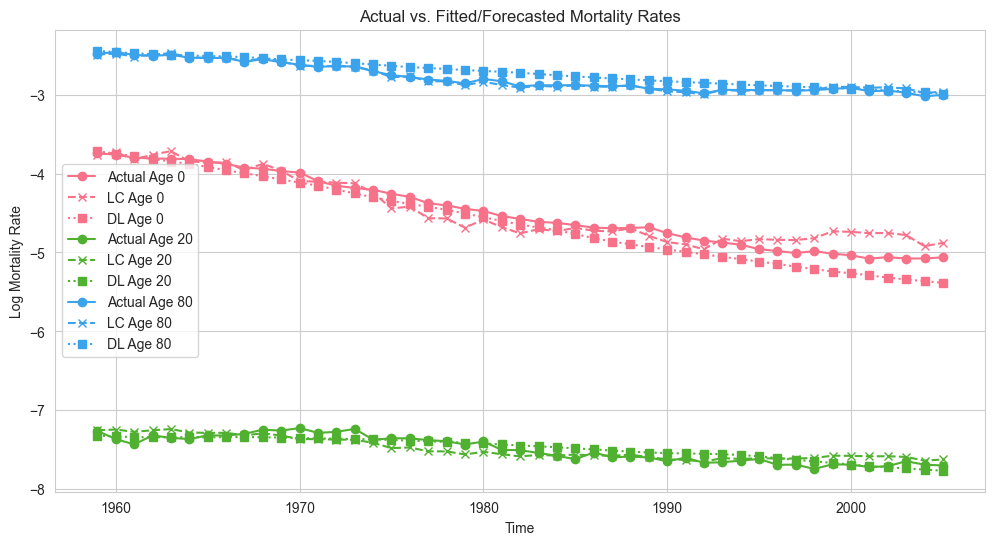

In [ ]:
# selected_ages = [0, 20, 80]
# time_col = 2
# mort_col = 4
# gender_col = 1
# years = np.unique(actual_us_train[:, time_col])

# # aesthetics
# sns.set_style("whitegrid")
# colors = sns.color_palette("husl", len(selected_ages))

# plt.figure(figsize=(12, 6))

# for idx, age in enumerate(selected_ages):
#     # Filter data for the given age
#     actual_subset = actual_us_train[(actual_us_train[:, 3] == age) & (actual_us_train[:, gender_col] == 0)]
#     predicted_subset = lc_final[(lc_final[:, 3] == age) & (lc_final[:, gender_col] == 0)]
#     predicted_subset_dl = country_train_pred_us_only[(country_train_pred_us_only[:, 3] == age) & (country_train_pred_us_only[:, gender_col] == 0)]

#     # Sort by time to ensure proper plotting
#     actual_subset = actual_subset[np.argsort(actual_subset[:, time_col])]
#     predicted_subset = predicted_subset[np.argsort(predicted_subset[:, time_col])]
#     predicted_subset_dl = predicted_subset_dl[np.argsort(predicted_subset_dl[:, time_col])]

#     # Extract values for plotting
#     time_series = actual_subset[:, time_col]
#     actual_rates = np.log(actual_subset[:, mort_col])
#     predicted_rates = np.log(predicted_subset[:, mort_col])
#     predicted_rates_dl = np.log(predicted_subset_dl[:, mort_col])

#     # Plot actual and predicted lines
#     plt.plot(time_series, actual_rates, label=f'Actual Age {age}', linestyle='-', marker='o', color=colors[idx])
#     plt.plot(time_series, predicted_rates, label=f'LC Age {age}', linestyle='--', marker='x', color=colors[idx])
#     plt.plot(time_series, predicted_rates_dl, label=f'DL Age {age}', linestyle=':', marker='s', color=colors[idx])


# # Formatting the plot
# plt.xlabel('Time')
# plt.ylabel('Log Mortality Rate')
# plt.title('Actual vs. Fitted/Forecasted Mortality Rates')
# plt.legend()
# plt.grid(True)
# plt.show()

Is deep learning / getting more data more helpful for countries with smaller population sizes?

In [29]:
next(iter(single_pred.values()))

array([[ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.47357416e+00],
       [ 5.00000000e+01,  1.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.21434021e+00],
       [ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
         1.00000000e+00, -8.07816410e+00],
       ...,
       [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
         9.80000000e+01, -1.02352881e+00],
       [ 5.00000000e+01,  0.00000000e+00,  2.01500000e+03,
         9.90000000e+01, -1.25424147e+00],
       [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
         9.90000000e+01, -1.12232816e+00]])

In [ ]:
print(single_pred)  # Debugging
print(type(actual_data_divided[i]))  # Debugging


{'AUS': array([[ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.47357416e+00],
       [ 5.00000000e+01,  1.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.21434021e+00],
       [ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
         1.00000000e+00, -8.07816410e+00],
       ...,
       [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
         9.80000000e+01, -1.02352881e+00],
       [ 5.00000000e+01,  0.00000000e+00,  2.01500000e+03,
         9.90000000e+01, -1.25424147e+00],
       [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
         9.90000000e+01, -1.12232816e+00]]), 'AUT': array([[ 5.10000000e+01,  0.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.56208324e+00],
       [ 5.10000000e+01,  1.00000000e+00,  2.00600000e+03,
         0.00000000e+00, -5.38873386e+00],
       [ 5.10000000e+01,  0.00000000e+00,  2.00600000e+03,
         1.00000000e+00, -8.22190666e+00],
       ...,
       [ 5.10000000e+01,  1.00000000e+00,

In [30]:
mse_results_by_country = []
rmse_results_by_country = []
rrmse_results_by_country = []
for i in range(0,38):
    lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_divided[i], actual_data_divided[i])
    lm_mse_overall, lm_rmse_overall, lm_rrmse_overall = evaluation_functions.calculate_error(lm_test_divided[i], actual_data_divided[i])
    coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_divided[i], actual_data_divided[i])
    dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_divided[i], actual_data_divided[i])
    
    single_ctry = list(single_pred.values())[i]
    dl_single_mse_overall, dl_single_rmse_overall, dl_single_rrmse_overall = evaluation_functions.calculate_error(
        single_ctry, actual_data_divided[i])

    mses = np.array([lc_mse_overall, lm_mse_overall, coh_mse_overall, dl_single_mse_overall, dl_mse_overall])
    rmses = np.array([lc_rmse_overall, lm_rmse_overall, coh_rmse_overall, dl_single_rmse_overall, dl_rmse_overall])
    rrmses = np.array([lc_rrmse_overall, lm_rrmse_overall, coh_rrmse_overall, dl_single_rrmse_overall, dl_rrmse_overall])
    mse_results_by_country.append(mses)
    rmse_results_by_country.append(rmses)
    rrmse_results_by_country.append(rrmses)

In [31]:
lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_pred, country_test)
lm_mse_overall, lm_rmse_overall, lm_rrmse_overall = evaluation_functions.calculate_error(lm_test_pred, country_test)
coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_pred, country_test)
dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_pred, country_test)

In [32]:
last_values = [arr[-2] for arr in mse_results_by_country]
single_ctry_ave_mse = np.mean(last_values)
print(single_ctry_ave_mse)


0.2164793822216809


In [33]:
overalls = np.array([lc_mse_overall, lm_mse_overall, coh_mse_overall, single_ctry_ave_mse, dl_mse_overall])

In [34]:
new_mses = np.row_stack([mse_results_by_country, overalls])

In [35]:
print(new_mses.shape)

(39, 5)


In [ ]:
new_mses

array([[4.21841015e-02, 4.19953597e-02, 3.28505678e-02, 3.40474321e-02,
        2.21285861e-02],
       [8.92916404e-02, 1.03268648e-01, 8.69728432e-02, 6.90807073e-02,
        6.01730870e-02],
       [7.56153838e-02, 7.53884515e-02, 6.03466221e-02, 5.14306614e-02,
        4.69192710e-02],
       [1.53215132e-01, 7.99151777e-02, 4.97209297e-02, 8.39861315e-02,
        4.08625424e-02],
       [1.37275073e-01, 1.31475875e-01, 8.31040911e-02, 8.05037432e-02,
        6.00443119e-02],
       [3.06855364e-02, 2.31418551e-02, 2.16370356e-02, 1.94781403e-02,
        2.05713121e-02],
       [1.56932164e-01, 1.43850144e-01, 1.33294808e-01, 9.71253029e-02,
        8.69757998e-02],
       [7.35584907e-02, 9.32978863e-02, 7.30407650e-02, 5.74520660e-02,
        5.50690187e-02],
       [2.09333064e-01, 1.90661213e-01, 1.72217124e-01, 1.39919215e-01,
        1.21781469e-01],
       [1.29738061e-01, 5.54100603e-02, 6.25426099e-02, 5.04379613e-02,
        3.89379593e-02],
       [9.08967013e-01, 8.2853

In [36]:
geos_key
new = np.array([["Overall", 88]])
geos_key_new = np.vstack([geos_key, new])
geos_key_new

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  

In [37]:
full_names_mapping = {
    # US states
    'AK': 'Alaska', 'AL': 'Alabama', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',

    # Countries
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'BLR': 'Belarus',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CZE': 'Czech Republic', 'DNK': 'Denmark',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRATNP': 'France',
    'GBRTENW': 'England and Wales', 'GBR_NIR': 'Northern Ireland',
    'GBR_SCO': 'Scotland', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland',
    'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL_NM': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia',
    'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TWN': 'Taiwan',
    'UKR': 'Ukraine', 'USA': 'United States', 'NZL_NM': 'New Zealand',
    'Overall': 'Overall'
}

# Convert your existing array
geos_key_full_names = np.array([
    [full_names_mapping.get(code, code), idx] for code, idx in geos_key_new
])

In [38]:
import pandas as pd

# Create a DataFrame
df_mse = pd.DataFrame(
    new_mses,
    columns=['LC', 'LM', 'Coherent', 'DL Single', 'DL All'],
    index=[geos_key_full_names[i+50, 0] for i in range(len(new_mses))]
)

# Convert the DataFrame to a LaTeX formatted table
latex_table = df_mse.to_latex(index=True, float_format="%.4f")

# Display or save the LaTeX code
print(latex_table)

\begin{tabular}{lrrrrr}
\toprule
 & LC & LM & Coherent & DL Single & DL All \\
\midrule
Australia & 0.0422 & 0.0420 & 0.0329 & 0.0340 & 0.0221 \\
Austria & 0.0893 & 0.1033 & 0.0870 & 0.0691 & 0.0602 \\
Belgium & 0.0756 & 0.0754 & 0.0603 & 0.0514 & 0.0469 \\
Bulgaria & 0.1532 & 0.0799 & 0.0497 & 0.0840 & 0.0409 \\
Belarus & 0.1373 & 0.1315 & 0.0831 & 0.0805 & 0.0600 \\
Canada & 0.0307 & 0.0231 & 0.0216 & 0.0195 & 0.0206 \\
Switzerland & 0.1569 & 0.1439 & 0.1333 & 0.0971 & 0.0870 \\
Czech Republic & 0.0736 & 0.0933 & 0.0730 & 0.0575 & 0.0551 \\
Denmark & 0.2093 & 0.1907 & 0.1722 & 0.1399 & 0.1218 \\
Spain & 0.1297 & 0.0554 & 0.0625 & 0.0504 & 0.0389 \\
Estonia & 0.9090 & 0.8285 & 0.5768 & 0.6042 & 0.5262 \\
Finland & 0.3021 & 0.2003 & 0.1539 & 0.1319 & 0.1109 \\
France & 0.0325 & 0.0170 & 0.0220 & 0.0096 & 0.0156 \\
England and Wales & 0.0249 & 0.0193 & 0.0221 & 0.0120 & 0.0187 \\
Northern Ireland & 0.9134 & 0.4537 & 0.3491 & 0.3772 & 0.3254 \\
Scotland & 0.1359 & 0.1708 & 0.1314 & 0.132

In [ ]:
geo_dict

{0: 'AK',
 1: 'AL',
 2: 'AZ',
 3: 'AR',
 4: 'CA',
 5: 'CO',
 6: 'CT',
 7: 'DE',
 8: 'FL',
 9: 'GA',
 10: 'HI',
 11: 'ID',
 12: 'IL',
 13: 'IN',
 14: 'IA',
 15: 'KS',
 16: 'KY',
 17: 'LA',
 18: 'ME',
 19: 'MD',
 20: 'MA',
 21: 'MI',
 22: 'MN',
 23: 'MS',
 24: 'MO',
 25: 'MT',
 26: 'NE',
 27: 'NV',
 28: 'NH',
 29: 'NJ',
 30: 'NM',
 31: 'NY',
 32: 'NC',
 33: 'ND',
 34: 'OH',
 35: 'OK',
 36: 'OR',
 37: 'PA',
 38: 'RI',
 39: 'SC',
 40: 'SD',
 41: 'TN',
 42: 'TX',
 43: 'UT',
 44: 'VT',
 45: 'VA',
 46: 'WA',
 47: 'WV',
 48: 'WI',
 49: 'WY',
 50: 'AUS',
 51: 'AUT',
 52: 'BEL',
 53: 'BGR',
 54: 'BLR',
 55: 'CAN',
 56: 'CHE',
 57: 'CZE',
 58: 'DNK',
 59: 'ESP',
 60: 'EST',
 61: 'FIN',
 62: 'FRATNP',
 63: 'GBRTENW',
 64: 'GBR_NIR',
 65: 'GBR_SCO',
 66: 'GRC',
 67: 'HUN',
 68: 'IRL',
 69: 'ISL',
 70: 'ISR',
 71: 'ITA',
 72: 'JPN',
 73: 'LTU',
 74: 'LUX',
 75: 'LVA',
 76: 'NLD',
 77: 'NOR',
 78: 'NZL_NM',
 79: 'POL',
 80: 'PRT',
 81: 'RUS',
 82: 'SVK',
 83: 'SVN',
 84: 'SWE',
 85: 'TWN',
 86: 'UKR'

In [ ]:
85-50

35

Index 63: -0.1890824429041289
Index 76: -0.06323662982517697
Index 78: -0.19166570196319732
Index 81: -0.004029252540684203
Index 83: -1.5561703952103878


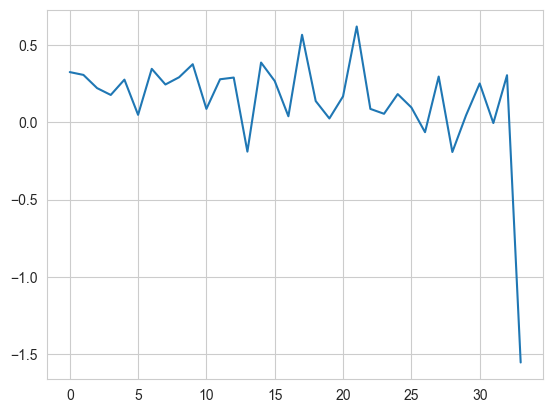

In [39]:
percent_improvement = []
for i in range(0,38):
    if 13 <= i <= 15:
        continue
    if i == 35:
        continue
    val = (1 - mse_results_by_country[i][4] / mse_results_by_country[i][2])
    percent_improvement.append(val)

plt.plot(percent_improvement)
for idx, value in enumerate(percent_improvement):
    if value < 0:
        print(f"Index {idx + 50}: {value}")


In [ ]:
print(len(percent_improvement))

35


In [40]:
import pandas as pd
population_data_full = pd.read_csv('../data/pop-data.csv', delimiter=',', skiprows=4)

In [41]:
print(population_data_full)

                    Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54922.0      55578.0      56320.0      57002.0   
1      SP.POP.TOTL  130072080.0  13

In [42]:
valid_codes_full = set(full_names_mapping.values())
valid_codes_abr = set(geo_dict.values())

In [43]:
valid_codes_full.discard('Georgia')
valid_codes_abr.discard('GEO')

In [ ]:
print(valid_codes_full)

{'Overall', 'Italy', 'Wyoming', 'Canada', 'Oklahoma', 'New Mexico', 'Netherlands', 'Montana', 'Arizona', 'Utah', 'Greece', 'Nevada', 'Delaware', 'Czech Republic', 'Russia', 'Hawaii', 'United States', 'Colorado', 'Spain', 'Israel', 'Arkansas', 'Slovenia', 'Florida', 'New Zealand', 'Oregon', 'Belgium', 'Sweden', 'New York', 'Connecticut', 'Estonia', 'Alabama', 'Norway', 'Maryland', 'Ukraine', 'Missouri', 'Washington', 'Slovakia', 'Kansas', 'Belarus', 'Latvia', 'Kentucky', 'Louisiana', 'Indiana', 'England and Wales', 'Poland', 'Texas', 'Nebraska', 'Minnesota', 'Hungary', 'North Dakota', 'Australia', 'California', 'Michigan', 'Lithuania', 'Vermont', 'South Dakota', 'Illinois', 'Scotland', 'Austria', 'France', 'Ohio', 'Alaska', 'New Hampshire', 'Ireland', 'Luxembourg', 'Japan', 'Massachusetts', 'Pennsylvania', 'Northern Ireland', 'Finland', 'Tennessee', 'West Virginia', 'Denmark', 'North Carolina', 'South Carolina', 'Taiwan', 'Bulgaria', 'Mississippi', 'Iowa', 'Virginia', 'Idaho', 'Rhode Is

In [44]:
population_data_rows = population_data_full[population_data_full['Country Name'].isin(valid_codes_full) | (population_data_full['Country Code'].isin(valid_codes_abr))]

In [45]:
pop_data_1987 = population_data_rows[['Country Code', '1987']]


In [56]:
pop_data_1987.shape

(34, 2)

In [55]:
len(percent_improvement)

34

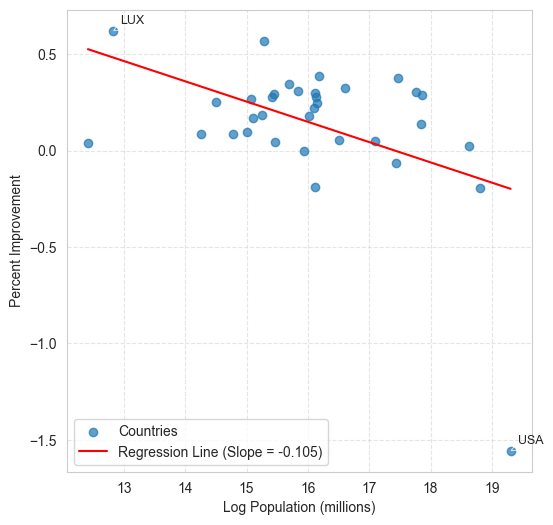

In [57]:

from scipy.stats import linregress

pop_data_1987_np = pop_data_1987.to_numpy()

# Convert population column to float
pop_data_1987_np[:, 1] = pop_data_1987_np[:, 1].astype(np.float64)

# Extract x-axis values (populations)
x_values = pop_data_1987_np[:, 1].astype(np.float64)
log_x = np.log(x_values)

slope, intercept, r_value, p_value, std_err = linregress(log_x, percent_improvement)

x_fit = np.linspace(min(x_values), max(x_values), 100)  # Generate smooth x values
y_fit = slope * np.log(x_fit) + intercept 

# Create a larger figure
plt.figure(figsize=(6, 6))

# Create scatter plot

plt.scatter(log_x, percent_improvement, label="Countries", alpha=0.7)

for i in range(len(percent_improvement)):
    country = pop_data_1987.iloc[i]['Country Code']
    population = float(pop_data_1987.iloc[i]['1987'])
    improvement = percent_improvement[i]
    log_pop = np.log(population)

    if country in ['LUX', 'USA']:
        plt.annotate(country,
                     (log_pop, improvement),
                     textcoords="offset points",
                     xytext=(5, 5),
                     ha='left',
                     fontsize=9,
                     arrowprops=dict(arrowstyle='->', lw=0.5))


# Regression line
plt.plot(np.log(x_fit), y_fit, color='red', label=f"Regression Line (Slope = {slope:.3f})")

# Set x-axis limits from 0 to 340
#plt.xlim(0, 340)

# Improve readability
plt.xlabel("Log Population (millions)")
plt.ylabel("Percent Improvement")
#plt.title("Percent Improvement of Deep Learning over Coherent Model vs Log Population Size")
plt.grid(True, linestyle="--", alpha=0.5)  # Add a light grid
plt.legend(loc = "lower left")


# Show the plot
plt.show()

In [230]:
geos_key

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  